# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
import pandas as pd

In [3]:
df_a=pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [4]:
df_a['y_pred'] = df_a['proba'].apply(lambda x: 1  if x>0.5 else 0)

#f"{x} is even" if x %2==0 else f"{x} is odd"
#train_all['comment_text'] = train_all['comment_text'].apply(lambda x: text_cleaning(x))


In [5]:
df_a.head()

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [6]:
#To Calculate Confusion Matrix, we need to calculkate TP, FP, FN, TN
def calc_confusion_matrix(y_actual, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    #confusion_matrix = [[TP, FP], [FN, TN]]
    for i in range(len(df_a)):
        if y_actual[i]==1 and y_pred[i] == 1:
            TP +=1
        if y_actual[i] ==0 and y_pred[i] ==0:
            TN +=1
        if y_actual[i] == 0 and y_pred[i]==1:
            FP +=1
        if y_actual[i]==1 and y_pred[i]== 0:
            FN +=1
        
    return {'TP': TP , 'FP': FP, 'FN': FN, 'TN': TN}



In [7]:
confusion_matrix = calc_confusion_matrix(df_a.y, df_a.y_pred)

In [8]:
confusion_matrix
confusion_matrix_matrix = [[confusion_matrix['TP'], confusion_matrix['FP']], [confusion_matrix['FN'], confusion_matrix['TN']]]

In [9]:
confusion_matrix

{'TP': 10000, 'FP': 100, 'FN': 0, 'TN': 0}

In [10]:
confusion_matrix_matrix

[[10000, 100], [0, 0]]

<h4>F1 Score</h4>

In [11]:
precision = confusion_matrix['TP'] / (confusion_matrix['TP'] + confusion_matrix['FP'])
recall = confusion_matrix['TP'] / (confusion_matrix['TP'] + confusion_matrix['FN'])

In [12]:
f1_score = 2*precision* recall / (precision + recall)

In [13]:
print('The F1 score is: ', f1_score)

The F1 score is:  0.9950248756218906


<h4>AUC Score</h4>

In [14]:
from tqdm import tqdm_notebook      # purpose of import is to just see progress


In [15]:
unique_probability_thresholds

NameError: name 'unique_probability_thresholds' is not defined

In [16]:
def perf_metrics(df, y, proba):
    # get number of positive and negative examples in the dataset
    P = sum(y)
    N = len(y) - P
    TP = 0
    FP = 0
    TPR = []
    FPR = []
    sorted_df = df.sort_values(by=['proba'], ascending=False)

    thresholds = sorted_df['proba'].unique()

    #thresholds = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]
    for thresh in thresholds:
        FP=0
        TP=0
        thresh = round(thresh,2) #Limiting floats to two decimal points, or threshold 0.6 will be 0.6000000000000001 which gives FP=0
        for i in range(len(proba)): 
            if(proba[i] >= thresh):
                if(y[i] == 1):
                    TP += 1
                else:
                    FP += 1

        #We find the True positive rate and False positive rate based on the threshold
                
        TPR.append(TP/P)
        FPR.append(FP/N)

    return {'FPR' : FPR, 'TPR': TPR, 'AUC' :  np.trapz(TPR,FPR)}

In [17]:
FPR_TPR_AUC = perf_metrics(df_a, df_a.y, df_a.proba)

The AUC score is:  0.48755149999999997


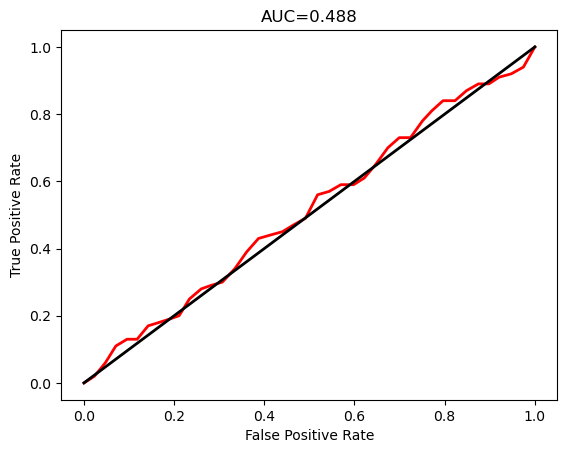

In [18]:
print('The AUC score is: ', FPR_TPR_AUC['AUC'])
plt.plot(FPR_TPR_AUC['TPR'],FPR_TPR_AUC['FPR'], 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={}'.format(round(FPR_TPR_AUC['AUC'],3)))
plt.show()

<h4>Accuracy</h4>

In [19]:
# Accuracy
Accuracy = (confusion_matrix['TP']+confusion_matrix['TN'])/df_a.shape[0]
print('The accuracy is: ',Accuracy)

The accuracy is:  0.9900990099009901




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [20]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [21]:
df_b.shape

(10100, 2)

In [22]:
df_b['y_pred'] = df_b['proba'].apply(lambda x: 1  if x>0.5 else 0)

In [23]:
df_b.head()

,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


<h4>Confusion Matrix</h4>

In [24]:
confusion_matrix_b = calc_confusion_matrix(df_b.y, df_b.y_pred)

In [25]:
matrix_b = [[confusion_matrix_b['TP'], confusion_matrix_b['FP']], [confusion_matrix_b['FN'], confusion_matrix_b['TN']]]

In [26]:
matrix_b

[[55, 239], [45, 9761]]

In [27]:
print('The confusion matrix is :', confusion_matrix_b)

The confusion matrix is : {'TP': 55, 'FP': 239, 'FN': 45, 'TN': 9761}


<h4>F1 Score</h4>

In [28]:
precision_b = confusion_matrix_b['TP'] / (confusion_matrix_b['TP'] + confusion_matrix_b['FP'])
recall_b = confusion_matrix_b['TP'] / (confusion_matrix_b['TP'] + confusion_matrix_b['FN'])

In [29]:
f1_score_b = 2*precision_b* recall_b / (precision_b + recall_b)

In [30]:
print('The F1 score is: ', f1_score_b)

The F1 score is:  0.2791878172588833


<h4>AUC Score</h4>

In [31]:
FPR_TPR_AUC_b = perf_metrics(df_b, df_b.y, df_b.proba)

The AUC score is:  0.937285


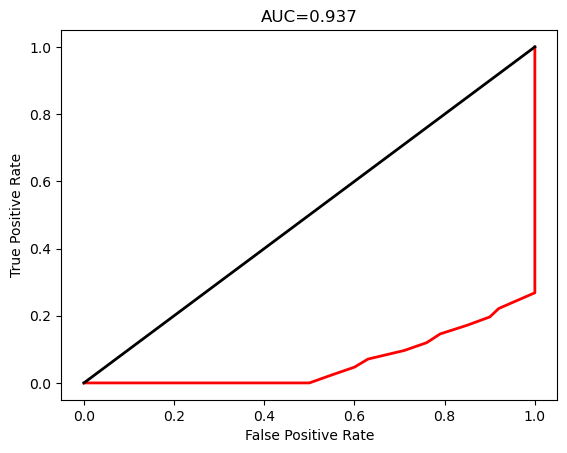

In [32]:
print('The AUC score is: ', FPR_TPR_AUC_b['AUC'])
plt.plot(FPR_TPR_AUC_b['TPR'],FPR_TPR_AUC_b['FPR'], 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={}'.format(round(FPR_TPR_AUC_b['AUC'],3)))
plt.show()

<h4>Accuracy</h4>

In [33]:
# Accuracy
Accuracy_b = (confusion_matrix_b['TP']+confusion_matrix_b['TN'])/df_b.shape[0]
print('The accuracy is: ',Accuracy_b)

The accuracy is:  0.9718811881188119


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [34]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [35]:
 # write your code for task C


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [36]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [37]:
 # write your code for task 5d

def sum_regression_error(df, y, y_pred):
    sum = 1
    for i in range(len(df)):
        error = abs(np.subtract(y[i], y_pred[i]))
        error_div = error/y[i]

        sum += error_div
    #MAPE = np.mean(sum) * 100
    return sum


In [38]:
MAPE = sum_regression_error(df_d, df_d.y, df_d.pred)

C:\Users\nehay\AppData\Local\Temp\ipykernel_15672\3282326584.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  error_div = error/y[i]
C:\Users\nehay\AppData\Local\Temp\ipykernel_15672\3282326584.py:7: RuntimeWarning: invalid value encountered in scalar divide
  error_div = error/y[i]


In [39]:
MAPE

nan

In [40]:
def sum_squared_regression_error(df, y, y_pred):
    for i in range(len(df)):
        difference =np.subtract(y[i], y_pred[i])
        square =  np.square(difference)
    return square

In [41]:
def MSE(df, y, y_pred):
    squared_sum = sum_squared_regression_error(df, y, y_pred)
    MSE = squared_sum/len(df)
    return MSE

In [42]:
MSE  = MSE(df_d, df_d.y, df_d.pred)

In [43]:
MSE

0.003365139949109415

In [44]:
def MAPE(df, y, y_pred):
    

SyntaxError: incomplete input (2502872550.py, line 2)

In [65]:
#y_pred = []
y_actual_values = []
for i in range(len(df_d)):
 
    y = df_a.y[i]
    y_actual_values.append(y)
    #y_pred = y_pred.append(df_a.y_pred[i])
    #print(df_d.y[i])


KeyError: 10100

In [53]:
print(y_actual)

None


In [ ]:
#R2 Error
def r2_error(df, y_actual, y_pred):
    y_mean = 1
    for i in range(len(df)):
        y_mean = y_mean.append(y_actual[i])
        pred_error = y_actual[i] - y_pred[i]
        mean_error = y_actual[i] - y_actual[i].mean()



In [66]:
def perf_metrics(y, proba):
    # get number of positive and negative examples in the dataset
    y_actual_values = []
    for i in range(len(proba)): 
        y = df_a.y[i]
        y_actual_values.append(y)

    return y_actual_values